# Kaggle HomeCredit EDA 

# 前書き

コンペティションの説明

不十分な、または存在しないクレジット履歴のために、多くの人々が融資を受けるのに苦労しています。 そして、残念なことに、この人口は、信頼できない貸し手によってしばしば利用されます。

ホームクレジットは、肯定的で安全な借入経験を提供することによって、非銀行人口の財政的包摂を広げるよう努める。 この不十分な人口が積極的なローン経験を持っていることを確認するために、ホームクレジットは、顧客の返済能力を予測するために、電話や取引情報を含むさまざまな代替データを利用しています。

ホームクレジットは現在、これらの予測を行うためにさまざまな統計的方法や機械学習方法を使用していますが、彼らは彼らのデータの潜在能力を最大限に発揮させるためにKagglersに挑戦しています。 そうすることで、返済可能なクライアントが拒絶されないこと、およびクライアントが成功するためのプリンシパル、成熟度、返済カレンダーでローンが提供されることが保証されます。

________



このカーネルは、EDAを目的として作業を進めていきます。

作業工程は

①問題の定義。  
②訓練データを取得する。  
③データを整理し、準備し、浄化する。  
④分析し、パターンを特定し、データを探索する。  
⑤モデル、予測し、問題を解決する。  
⑥問題を解決し、報告し、提示する。  

上記の手順で実行していきます。

# ①質問または問題の定義。

まず始めに、ファイルの全体構造をみていきましょう。  

各ファイルの中身などはkaggleで確認してください。  
https://www.kaggle.com/c/home-credit-default-risk/data

![image](https://storage.googleapis.com/kaggle-media/competitions/
home-credit/home_credit.png)

図をみて見ましょう。  
今回のコンペティションでは、とても多くのファイルが用意されています。  
下の階層のデータにはトランザクションデータなどもあり、とても大量のデータ量となってます。  
kaggleで上位を目指すには全てのデータを使わないと難しいかもしれませんが、データ量が膨大なため今回はapplication_trainを中心にデータ探索を行なっていきます。  
また今回の目標はtrainデータで学習できる所まで、データを整えていきたいと思います。  

そして今回のデータには、専門的な用語が数多く存在しますので分からない特徴などはデータセットにあるHomeCredit_columns_description.csvを確認し、しっかり理解してからEDAに臨みましょう。

# ②訓練データを取得する。

それでは始めに、必要なライブラリをインポートしていきます。  
また今回はcsvファイルはpandasを使い読み込みます。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#matplotlibをjupyternotebookで動かす際はこちらのコードを実行してください。


/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


これでデータを確認するためのライブラリが揃いました。  
次にデータをインポートしていきましょう。  
今回は数あるデータの中で"application_train"のデータ探索を行なっていきます。  
このデータは顧客のプロファイルなどの情報が入っておりここからでもある程度のモデルを作ることができます。

In [2]:
train = pd.read_csv("input/application_train.csv")
test = pd.read_csv("input/application_test.csv")

これでデータのインポートができました。  
まず始めに、データの量や特徴量を確認していきましょう。  
もしデータ量を確認せず特徴を順番に確認してしまうと時間がかかってしまうこともあります。  
まずはデータ全体から問題を洗い出すことが大切です。  
では実際にデータを確認していきましょう。

# ③データを整理し、準備し、浄化する。

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


なんとjupyternotebookのデフォルト設定では途切れてしまうほど特徴が多いではないですか！  
これをシラミ潰しに確認して行くことはとても非効率です。  
データが多いことをさらに確認するために、データ数を確認して見ましょう。

In [4]:
train.shape

(307511, 122)

このデータには307511のデータ量と122の特徴量があることがわかりました。  
誰もが通るチュートリアルのBostonやTitanicはここまでの特徴量がないのでとても悩ましいです。  
ここまで特量量が多いとまず何をすればいいのか分からなくなります・・・・  

そこで、まず私が考えるのはどうすれば学習できる形になるかを考えることです。  
そしてtrainデータを見てみると真っ先に文字列（カテゴリ変数）があることに気がつきました。  
カテゴリ変数の特徴が混じっていては、基本的なモデルでの学習ができません。  
実際にどの特徴がカテゴリ変数なのか確認していきましょう。

In [5]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

ん〜、これではよく分からないので分かりやすく可視化していきましょう。

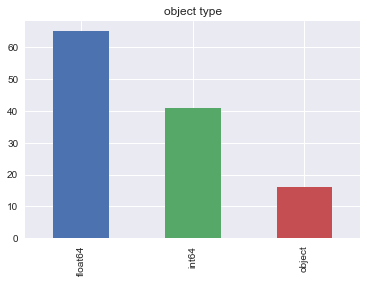

In [6]:
# train_type = pd.DataFrame(train.dtypes.value_counts())
# colorlist = ["r", "g", "b"]
# train_type.T.plot.bar(color = colorlist,width=2.1)
# plt.title("object type")

train.dtypes.value_counts().plot.bar()
plt.title("object type")
plt.show()

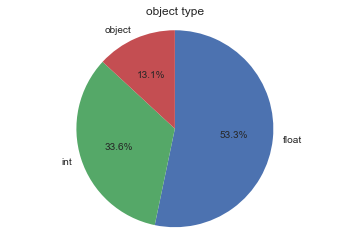

In [7]:
plt.title("object type")
plt.pie(train.dtypes.value_counts(), labels=["float","int","object"], counterclock=False, startangle=90 , autopct="%1.1f%%")
plt.axis('equal')
plt.show()

これで名前や性別などで、文字列が20項目ほど使われていることがわかりました。  
これでは学習することができません。  
この問題を解決するために今回はラベルエンコーダーとダミー変数を使っていきます。  
ラベルエンコーダーは文字列に番号を割り当てていく手法です。  
ダミー変数とはその文字列の名前を特徴として追加し、該当するものに１そうでないものを0にします。  
このダミー変数は文字列の種類だけ特徴が増えます。

今回は性別など２種類しかないものだけラベルエンコーダーを採用し、カテゴリ変数の種類が複数存在する特徴に対してはダミー変数を使用します。  
そしてカテゴリ変数を含む特徴が多いので、関数化し短略化します。


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def les(data):
    
    for col in data:
        if data[col].dtype == "object":
            if len(list(data[col].unique())) <= 2:
                le.fit(data[col])
            
                data[col] = le.transform(data[col])
                
    data = pd.get_dummies(data)
    return data

この関数で、カテゴリ変数の種類が２つ以下の特徴にだけラベルエンコーダが適用され、カテゴリ変数の種類が3つ以上の特徴にはダミー変数が適用される関数を作ることができました。　　
実際にこの関数を使いカテゴリ変数を数値変数に変えていきましょう。

In [9]:
train = les(train)
test = les(test)

In [10]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


これで簡単にカテゴリ変数を数値変数に変えることができました！  
実際にプロットでも確認して見ましょう！

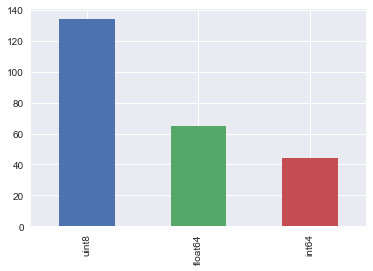

In [11]:
train.dtypes.value_counts().plot.bar()
plt.show()

object(カテゴリ変数)がunit8(数値変数）に変わってることが確認できました。  
これで1つ目の問題カテゴリ変数の変換が終わりました。  

それでは次の問題を見つけていきましょう。    
データ探索の際、多くの人が異常値や外れ値の確認をします。  
各特徴の統計を出して見ましょう！

In [12]:
pd.set_option("display.max_columns", 101)
train_desc = train.describe()
train_desc

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


順番に確認して行くとDAYS_EMPLOYEDの値がおかしいことに気がつきました。  
経過した日数を表している特徴ですが、最大値が **365243** になっています。  
これは計算すると約1000年になってしまいます。  
すぐに非現実的な数字であると分かりました。  
このように欠損がNan（Null値)になっておらず、別の言葉で入っていたり非現実的な数値が入っているデータは多々あります。  

実際にDAYS_EMPLOYEDの中身がどうなってるか確認していきましょう。

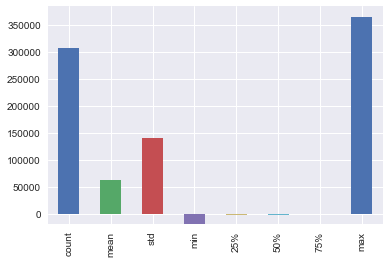

In [13]:
train_desc["DAYS_EMPLOYED"].plot.bar()

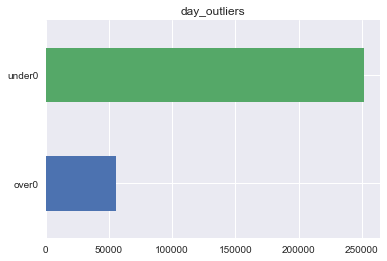

In [14]:
day_outliers = pd.Series([len(train[train["DAYS_EMPLOYED"]>0]),len(train[train["DAYS_EMPLOYED"]<0])])
day_outliers.index = ["over0","under0"]
plt.title("day_outliers")
day_outliers.plot.barh()



グラフから約５万のデータが異常な値であることが確認できました。  
これでは学習をしてもおかしなモデルが出来上がってしまいます。  
一刻も早く修正したいですが、日付に関わるデータは他にも沢山ありました。  
他のデータにも異常値が無いか確認していきましょう。


In [15]:
days_outliers = train_desc.loc[["max"]].T
days_outliers[days_outliers["max"] == 365243]

,max
DAYS_EMPLOYED,365243.0


trainデータの日付に関する異常値はDAYS_EMPLOYEDだけであることがわかりました。  
それでは異常値をNan(null値)に置き換えていきます。
また異常値に意味がある可能性もあるので、異常値だけを新しい特徴として追加することで異常値が重要な役割をしていた場合に備えましょう。  
そして日付データがマイナスになっているので、念のため絶対値に戻してあげましょう。  

こちらも他のデータで同じ異常値がある場合があるため、関数化していきます。

In [16]:
# 異常値変更
def nan_change(data):
    data_d = data.describe()
   

    for i in data_d:
        if data_d[i]["max"] == 365243:
            data[i + "_ANOM"] = data[i] == 365243
            data[i + "_ANOM"] = data[i + "_ANOM"] *1
            data[i].replace({365243: np.nan}, inplace = True)
            
    data_d2 = data.describe()
    for i2 in data_d2:
            if data_d2[i2]["max"] <= 0:
                data[i2] = abs(data[i2])
                
    return data

これで関数化することが出来ました！  
実際に置き換えられているか、実際に確認していきましょう

In [17]:
train = nan_change(train)
test = nan_change(test)

In [18]:
train["DAYS_EMPLOYED"][:10]

0     637.0
1    1188.0
2     225.0
3    3039.0
4    3038.0
5    1588.0
6    3130.0
7     449.0
8       NaN
9    2019.0
Name: DAYS_EMPLOYED, dtype: float64

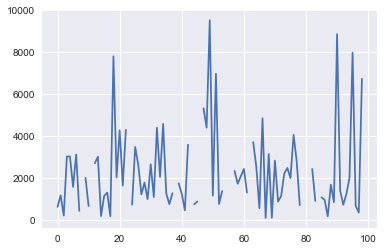

In [19]:
train["DAYS_EMPLOYED"][:100].plot()

途切れている所にはNanが代入され、1000年のような異常値が無いことが確認できました。  

それでは最後にNan値を処理しないといけません。  
方法は様々で平均や最小値を代入する場合やK近傍法でNan値を予測したり欠損のある行や列を削除して対処することもあります。  

実際にkaggleで上位入賞を狙う場合は様々なモデルを試すことになるので、データの傾向を把握してからNan値の処理をする必要があります。  
その場合、”なぜ欠損しているのか？”を考えることが重要です。  
欠損は完全にランダムなのか？もしくは意図的な欠損では無いのか？欠損が大半を占めていないか？など様々な状況に応じて欠損を処理することになります。  
  
では欠損の状態を確認していきましょう！  

In [20]:
train_null = train.isnull().sum().sort_values()[::-1]
train_null[:20]

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
FLOORSMIN_MODE              208642
FLOORSMIN_AVG               208642
FLOORSMIN_MEDI              208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_MODE            204488
YEARS_BUILD_AVG             204488
OWN_CAR_AGE                 202929
LANDAREA_AVG                182590
LANDAREA_MODE               182590
LANDAREA_MEDI               182590
BASEMENTAREA_AVG            179943
dtype: int64

欠損の多いデータが沢山あることが確認できました  。
ただこれでは分かりにくいので、どのくらいが欠損値なのか可視化していきましょう。

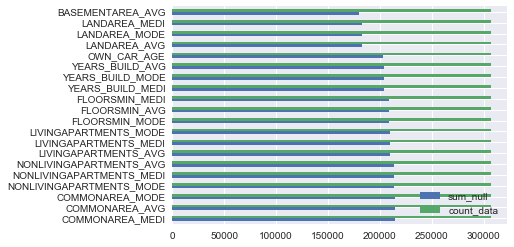

In [21]:
train_null = pd.DataFrame(train_null)
train_null["count_data"] = 307511
train_null.columns = ["sum_null","count_data"]
train_null[:20].plot.barh()

このように全体の半分以上のデータが欠損している特徴がかなり多いことがわかりました。  
これは欠損の対応が難しいですね。  
データ数が比較的に多い事も考慮し、今回は半分以上が欠損している特徴は削除し、欠損のある行も消してしまいましょう。  
また現段階でこの対処方法が正しいかはわかりませんが、データ数の少ない時に欠損を削除してしまうと偏りが出やすくなってしまうので注意が必要です。

それでは欠損の処理をしていきましょう！

In [22]:
train = train.drop(train_null[:30].index, axis = 1)
test = test.drop(train_null[:30].index, axis = 1)


In [23]:
train = train.dropna()
test = test.dropna()

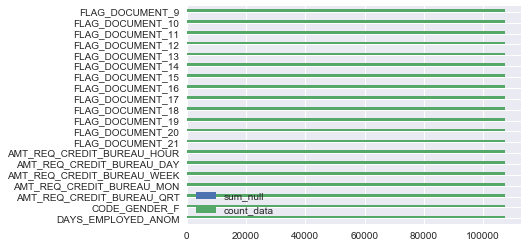

In [24]:
train_null = train.isnull().sum().sort_values()[::-1]
train_null = pd.DataFrame(train_null)
train_null["count_data"] = 107511
train_null.columns = ["sum_null","count_data"]
train_null[:20].plot.barh()

これで欠損を全て処理することができました。  
また欠損の処理方法は様々なものがあります。  
もしモデルのスコアが良くなかった場合は色々な方法で欠損の処理を試みましょう。

お疲れ様です！  
ひとまず学習することが可能な形に出来たので、データの整備はここまでにします。  
それでは次の工程に入りましょう！

# ④分析し、パターンを特定し、データを探索する。

やっとここまで来ましたね！  
ここからデータの分析を始めていきます。  

まずは適当に探索するのではなく、TARGET（今回予測をする対象の特徴）との相関を調べていきましょう。  
そこからTARGETを予測するのに一番必要な特徴が何なのか分かるかもしれません。

In [25]:
train_corr = train.corr()

In [26]:
target_corr = train_corr["TARGET"].sort_values()
target_corr = target_corr.dropna()

In [27]:
target_corr

EXT_SOURCE_3                                        -0.168818
EXT_SOURCE_2                                        -0.149786
DAYS_EMPLOYED                                       -0.066392
DAYS_BIRTH                                          -0.061130
NAME_EDUCATION_TYPE_Higher education                -0.060186
FLOORSMAX_AVG                                       -0.048710
FLOORSMAX_MEDI                                      -0.048455
FLOORSMAX_MODE                                      -0.047839
AMT_GOODS_PRICE                                     -0.044667
CODE_GENDER_F                                       -0.042894
DAYS_LAST_PHONE_CHANGE                              -0.042867
DAYS_ID_PUBLISH                                     -0.037868
AMT_CREDIT                                          -0.035678
LIVINGAREA_AVG                                      -0.035117
NAME_CONTRACT_TYPE                                  -0.034725
LIVINGAREA_MEDI                                     -0.034521
TOTALARE

なんて悩ましい相関なのでしょうか。  
TARGETに対して負の相関も正の相関係数の高い値が全然ありません。  
これはどの特徴を使って学習すればいいか悩ましいですね。。。

TRAGETに対する相関係数をプロットして見てみましょう。

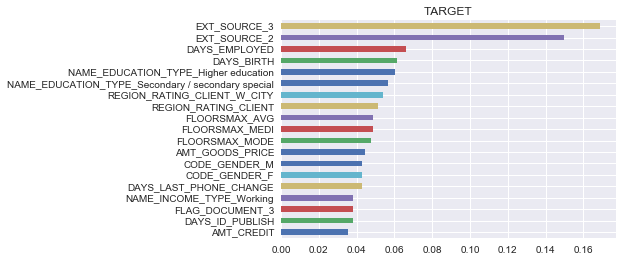

In [28]:
abs(target_corr).sort_values()[-20:-1].plot.barh()
plt.title("TARGET")
plt.show()

このようにグラフで表すと新たな発見がありました！  

EXT_SOURCE2とEXT_SOURCE3はTARGETに対してそれなりに相関が高いことがわかりました。    
ところでEXT_SOURCE2とEXT_SOURCE3とは何を意味しているのでしょうか？  
データセットに同梱されている特徴名の説明を読んでも詳しいことは書いてありません。  
なので実際にEXT_SOURCE2とEXT_SOURCE3がどういった特徴なのか少し探索して見ましょう！

In [33]:
ext2_corr = train_corr["EXT_SOURCE_2"].sort_values()
ext2_corr = ext2_corr.dropna()

ext3_corr = train_corr["EXT_SOURCE_3"].sort_values()
ext3_corr = ext3_corr.dropna()

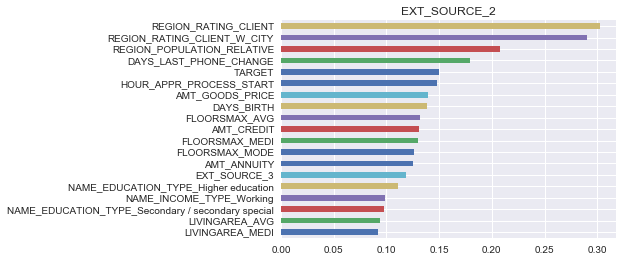

In [37]:
abs(ext2_corr).sort_values()[-20:-1].plot.barh()
plt.title("EXT_SOURCE_2")

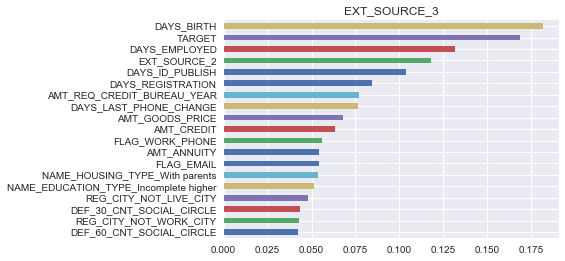

In [36]:
abs(ext3_corr).sort_values()[-20:-1].plot.barh()
plt.title("EXT_SOURCE_3")

これは面白いことがわかりました！  
実際に何を意味しているのか分からなかった2つの特徴の中身が少し見えて来ました。  
EXT_SOURCE_2にはユーザのいる地域などの情報との相関がとても高い事から、地域に関する指標だと予測を立てることができました。  
EXT_SOURCE_3に関してはユーザの年齢や職場の在籍期間など、年齢や年月に関する情報との相関が高くユーザーのプロファイルに関する指標だということが分かります。  

これでTARGETに対する相関の高い特徴や内容が大分把握できたのではないでしょうか？  
このように相関の高い情報が何を意味しているのかを知ることはとても大切です。  

このカーネルもいよいよ終盤に入りました！  
それでは次の工程に移りましょう！


# ⑤モデル、予測し、問題を解決する。

実際にkaggleで上位を狙うには、複数のモデルをで検証を行う必要があります。  
kaggleでは特にモデルに対するディスカッションが頻繁に行われています。  
最初は、ディスカッションを参考にしてモデルを選ぶ事も良い方法でしょう。  
今回はEDAが目的のカーネルでしたので、ディスカッションで良いと結論づけられている、Light GBMを使い予測してみたいと思います。

**それではモデルを作り、学習をし予測していきましょう！**

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """クロスバリデーションを使用して軽い勾配ブースティングモデル
         をトレーニングし、テストします。
    
    パラーメーター
    --------
        features (pd.DataFrame): 
            モデルのトレーニングに使用するtrainデータのデータフレーム。 
            TARGET列を含める必要があります。
        test_features (pd.DataFrame): 
            モデルを使用して予測を行うために使用するテストデータのデータフレーム
        encoding (str, default = 'ohe'): 
            カテゴリ変数を符号化する方法。 1ホットエンコーディングの場合は
            'ohe'、整数ラベルのエンコーディングの場合は 'le' n_folds（int、default = 5）
            ：相互検証に使用する折り畳みの数
        
    Return
    --------
        submission (pd.DataFrame): 
           モデルによって予測された `SK_ID_CURR`TARGET'を持つデータフレームです。
        feature_importances (pd.DataFrame): 
            モデルからの特徴のインポートとデータフレーム。
        valid_metrics (pd.DataFrame): 
            それぞれの折りたたみや全体のトレーニングと検証メトリック（ROC AUC）を備えたデータフレーム
    """
    
    # idを抽出する
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # トレーニングのためにラベルを抽出する
    labels = features['TARGET']
    
    # idとラベルを削除
    features = features.drop(['SK_ID_CURR', 'TARGET'],axis = 1)
    test_features = test_features.drop(['SK_ID_CURR'],axis = 1)
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # データフレームを列で整列する
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # 記録すべきカテゴリーインデックス
        cat_indices = 'auto'
    
    # 整数ラベルエンコーディング
    elif encoding == 'le':
        
        # label encoder作成
        label_encoder = LabelEncoder()
        
        # カテゴリインデックスを格納するためのリスト
        cat_indices = []
        
        # 各列を繰り返す
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # カテゴリのフィーチャを整数にマップする
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # カテゴリインデックスを記録する
                cat_indices.append(i)
    
    # ラベルエンコーディングスキームが有効でない場合、キャッチエラー
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # 特徴名を抽出する

    feature_names = list(features.columns)
    
    # np配列に変換する
    features = np.array(features)
    test_features = np.array(test_features)
    
    # kfold objectの作成
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # フィーチャの高さのための空の配列
    feature_importance_values = np.zeros(len(feature_names))
    
    # テスト予測のための空の配列
    test_predictions = np.zeros(test_features.shape[0])
    
    # k_fold検証の予測のための空の配列
    out_of_fold = np.zeros(features.shape[0])
    
    # 記録の検証とトレーニングのスコアのリスト
    valid_scores = []
    train_scores = []
    
    # k_fold返しを繰り返します。
    for train_indices, valid_indices in k_fold.split(features):
        
        # フォールドのトレーニングデータ

        train_features, train_labels = features[train_indices], labels[train_indices]
        # フォールドの検証データ
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # モデルを作成する
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # モデルをトレーニングする
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # 最良の反復を記録する
        best_iteration = model.best_iteration_
        
        # 特徴の重要度を記録する
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # 予測を行います
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # フォールドアウトの予測を記録する
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # 一番良いスコアを記録
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
    
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # メモリをクリーンアップする
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # 予測データの作成
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # 特徴の重要性のデータフレームを作成する
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # 全体的な検証スコア
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # メトリックに全体的なスコアを追加する
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # 検証スコアのデータフレームを作成するために必要
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # 検証スコアのデータフレーム
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [41]:
train = train.reset_index()
test = test.reset_index()

これで学習を行う準備ができました。  
では最後に学習しその結果を表示していきましょう！

# ⑥問題を解決し、報告し、提示する。

In [85]:
submission, fi, metrics = model(train, test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (96362, 208)
Testing Data Shape:  (16112, 208)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.758433	train's auc: 0.859413
Early stopping, best iteration is:
[134]	valid's auc: 0.759407	train's auc: 0.832059
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.748348	train's auc: 0.861446
Early stopping, best iteration is:
[110]	valid's auc: 0.750731	train's auc: 0.823387
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.747123	train's auc: 0.859686
Early stopping, best iteration is:
[127]	valid's auc: 0.749285	train's auc: 0.829567
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.739376	train's auc: 0.860075
Early stopping, best iteration is:
[107]	valid's auc: 0.741801	train's auc: 0.820459
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.733702	train's auc: 0.861954
Early stopping, best itera

上のスコアが学習した後に出て来たスコアです。  
今回はコンペティションの採点方法にしたがってauc方式で採点を行いました。  
その結果、最良のスコアは**0.759407**でした。  
最初のEDAでここまでスコアを出すことができれば合格点ではないでしょうか？  

最後に学習したモデルがどの特徴を重視したのか見てみましょう。

In [52]:
fi

,feature,importance
0,index,112.4
1,NAME_CONTRACT_TYPE,57.4
2,FLAG_OWN_CAR,34.4
3,FLAG_OWN_REALTY,5.6
4,CNT_CHILDREN,8.8
5,AMT_INCOME_TOTAL,90.6
6,AMT_CREDIT,207.0
7,AMT_ANNUITY,190.2
8,AMT_GOODS_PRICE,158.0
9,REGION_POPULATION_RELATIVE,99.4


In [86]:
fi = fi.sort_values(by = "importance")[::-1]
fis = fi.set_index('feature')
fis = fis[:20][::-1].T

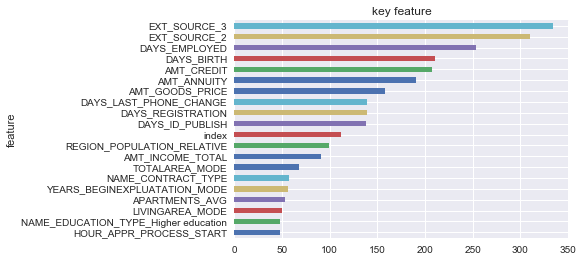

In [124]:
name = fi["feature"]
value = fi["importance"]
value.index = name

value[:20][::-1].plot.barh()
plt.title("key feature")
plt.show()

お疲れ様です！  
以上で今回のEDAは終わりとなります。  
いかがでしたでしょうか？  
まだまだ不慣れですが、データ探索の参考になれば幸いです。
